In [2]:
""" Fajar Arif Kurniawan.
    https://data.world/data-society/global-climate-change-data
"""

' Fajar Arif Kurniawan.\n    https://data.world/data-society/global-climate-change-data\n'

In [3]:
# import data frame library
import pandas as pd
import json
import numpy as np

import warnings
warnings.filterwarnings('ignore')
# Visualization LIbrary
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import scipy.stats as stats
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [4]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
data.drop(['City','Latitude','Longitude'], axis=1, inplace=True)
display(data)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1849-01-01,26.704,1.435,Côte D'Ivoire
1,1849-02-01,27.434,1.362,Côte D'Ivoire
2,1849-03-01,28.101,1.612,Côte D'Ivoire
3,1849-04-01,26.140,1.387,Côte D'Ivoire
4,1849-05-01,25.427,1.200,Côte D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


Mengambil data dari tahun 28-07-1914 sampai 28-07-2013

In [6]:
data['dt'] = pd.to_datetime(data['dt'])
get_data = (data['dt'] >= '1914-07-28') & (data['dt'] <= '2013-07-28')
data = data.loc[get_data]
display(data)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
787,1914-08-01,24.001,0.678,Côte D'Ivoire
788,1914-09-01,25.283,0.771,Côte D'Ivoire
789,1914-10-01,25.697,1.784,Côte D'Ivoire
790,1914-11-01,26.737,1.077,Côte D'Ivoire
791,1914-12-01,26.873,1.018,Côte D'Ivoire
...,...,...,...,...
239170,2013-03-01,10.110,0.480,China
239171,2013-04-01,12.563,1.823,China
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China


In [7]:
data['Country'].value_counts()

China                                 19008
India                                 16632
Brazil                                 7128
Turkey                                 3564
Pakistan                               3564
United States                          3564
Egypt                                  3564
Nigeria                                3564
Colombia                               2376
Australia                              2376
South Africa                           2376
Saudi Arabia                           2376
Indonesia                              2376
Canada                                 2376
Russia                                 2376
Japan                                  2376
Congo (Democratic Republic Of The)     1188
United Kingdom                         1188
Dominican Republic                     1188
France                                 1188
Ethiopia                               1188
Bangladesh                             1188
Senegal                         

Mengambil data miliki negara Indonesia

In [8]:
data = data.loc[data['Country'].isin(['China'])]
display(data)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
48166,1914-08-01,22.322,0.420,China
48167,1914-09-01,15.451,0.439,China
48168,1914-10-01,8.525,0.254,China
48169,1914-11-01,-7.990,1.196,China
48170,1914-12-01,-16.270,0.574,China
...,...,...,...,...
239170,2013-03-01,10.110,0.480,China
239171,2013-04-01,12.563,1.823,China
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China


In [9]:
data.drop(['Country'], axis=1, inplace=True)
data.reset_index(drop=True)

,dt,AverageTemperature,AverageTemperatureUncertainty
0,1914-08-01,22.322,0.420
1,1914-09-01,15.451,0.439
2,1914-10-01,8.525,0.254
3,1914-11-01,-7.990,1.196
4,1914-12-01,-16.270,0.574
...,...,...,...
19003,2013-03-01,10.110,0.480
19004,2013-04-01,12.563,1.823
19005,2013-05-01,18.979,0.807
19006,2013-06-01,23.522,0.647


In [10]:
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
dtype: int64

In [11]:
data.dropna(subset=['AverageTemperature'],inplace=True)
data.dropna(subset=['AverageTemperatureUncertainty'],inplace=True)
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
dtype: int64

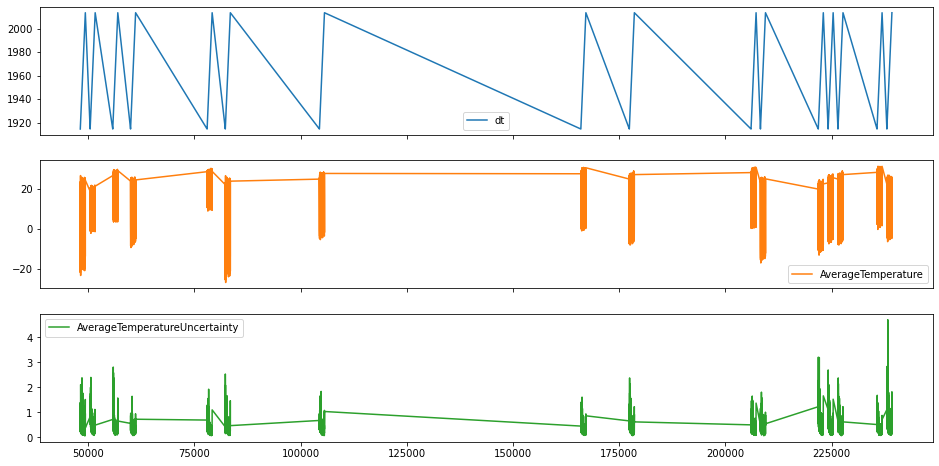

In [12]:
data_plot = data
data_plot[data_plot.columns.to_list()].plot(subplots=True, figsize=(16,8))
plt.show()

In [13]:
dates = data['dt'].values
tempe = data['AverageTemperature'].values

Text(0.5, 0, 'Datetime')

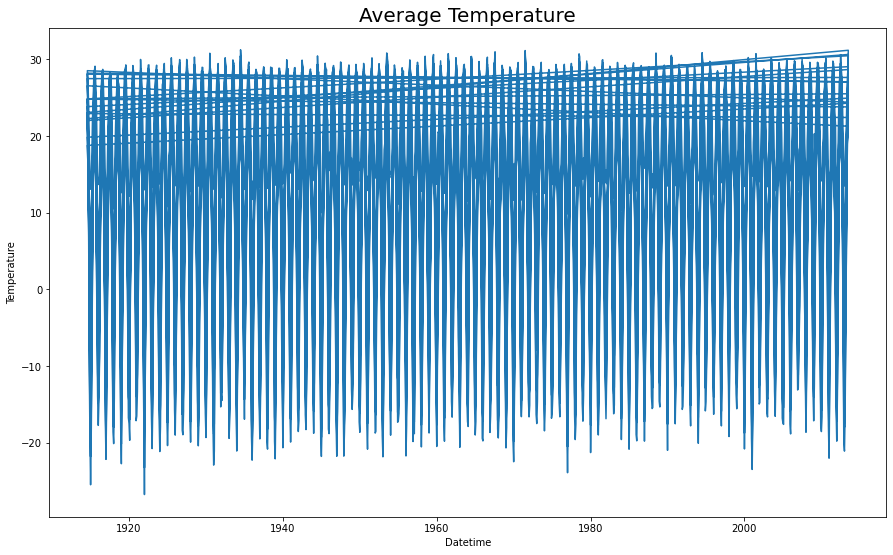

In [14]:
dates = np.array(dates)
temp = np.array(tempe)

plt.figure(figsize=(15,9))
plt.plot(dates, tempe)

plt.title('Average Temperature', fontsize = 20)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size=0.8, test_size = 0.2, shuffle = False )

In [16]:
print('Total Data Train : ',len(x_train))
print('Total Data Validation : ',len(x_valid))

Total Data Train :  15206
Total Data Validation :  3802


In [17]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [18]:
tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

model = Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

In [19]:
Mae = (data['AverageTemperature'].max() - data['AverageTemperature'].min()) * 10/100
print(Mae)

5.8004999999999995


In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae')<5.8 and logs.get('val_mae')<5.8):
            print("\nMAE dari model < 10% skala data")
            self.model.stop_training = True
callbacks = myCallback()

In [21]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

Epoch 1/100
76/76 [==============================] - 27s 310ms/step - loss: 13.5974 - mae: 14.0912 - val_loss: 13.3354 - val_mae: 13.8294
Epoch 2/100
76/76 [==============================] - 25s 328ms/step - loss: 13.2498 - mae: 13.7438 - val_loss: 12.9063 - val_mae: 13.4009
Epoch 3/100
76/76 [==============================] - 25s 323ms/step - loss: 12.8193 - mae: 13.3132 - val_loss: 12.3032 - val_mae: 12.7982
Epoch 4/100
76/76 [==============================] - 24s 319ms/step - loss: 12.2090 - mae: 12.7016 - val_loss: 11.4162 - val_mae: 11.9077
Epoch 5/100
76/76 [==============================] - 25s 321ms/step - loss: 11.3314 - mae: 11.8243 - val_loss: 10.2309 - val_mae: 10.7178
Epoch 6/100
76/76 [==============================] - 25s 321ms/step - loss: 10.2190 - mae: 10.7105 - val_loss: 9.0577 - val_mae: 9.5532
Epoch 7/100
76/76 [==============================] - 25s 327ms/step - loss: 9.2447 - mae: 9.7373 - val_loss: 8.2279 - val_mae: 8.7154
Epoch 8/100
76/76 [=====================

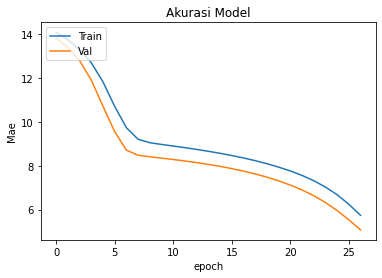

In [22]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

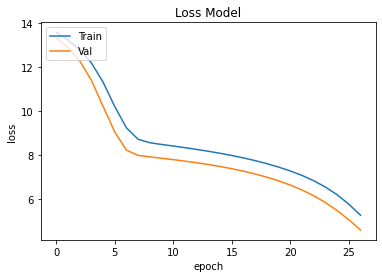

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()